# Lab 02: Basic NLP Preprocessing Techniques

**Course:** ITAI 2373 - Natural Language Processing  
**Module:** 02 - Text Preprocessing  
**Duration:** 2-3 hours  
**Student Name:** Adejare Fasiku   
**Date:** 06/8/2025  

---

## 🎯 Learning Objectives

By completing this lab, you will:
1. Understand the critical role of preprocessing in NLP pipelines
2. Master fundamental text preprocessing techniques
3. Compare different libraries and their approaches
4. Analyze the effects of preprocessing on text data
5. Build a complete preprocessing pipeline
6. Load and work with different types of text datasets

## 📖 Introduction to NLP Preprocessing

Natural Language Processing (NLP) preprocessing refers to the initial steps taken to clean and transform raw text data into a format that's more suitable for analysis by machine learning algorithms.

### Why is preprocessing crucial?

1. **Standardization:** Ensures consistent text format across your dataset
2. **Noise Reduction:** Removes irrelevant information that could confuse algorithms
3. **Complexity Reduction:** Simplifies text to focus on meaningful patterns
4. **Performance Enhancement:** Improves the efficiency and accuracy of downstream tasks

### Real-world Impact
Consider searching for "running shoes" vs "Running Shoes!" - without preprocessing, these might be treated as completely different queries. Preprocessing ensures they're recognized as equivalent.

### 🤔 Conceptual Question 1
**Before we start coding, think about your daily interactions with text processing systems (search engines, chatbots, translation apps). What challenges do you think these systems face when processing human language? List at least 3 specific challenges and explain why each is problematic.**

*Double-click this cell to write your answer:*

**Challenge 1:**
Word Ambiguity – Words can have multiple meanings (e.g., “bank” as in river bank, finance bank, or bank as in rely on), making it hard for systems to understand intent.

**Challenge 2:**
Informal Language & Typos – Slang, abbreviations, and misspellings confuse systems that expect standard language.

**Challenge 3:**
Complex Grammar – Irregular sentence structures and broken grammar make it hard to extract accurate meaning.

---

## 🛠️ Part 1: Environment Setup

We'll be working with two major NLP libraries:
- **NLTK (Natural Language Toolkit):** Comprehensive NLP library with extensive resources
- **spaCy:** Industrial-strength NLP with pre-trained models

**⚠️ Note:** Installation might take 2-3 minutes to complete.

🔧 Installing NLP libraries...
  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.7.1/en_core_web_sm-3.7.1-py3-none-any.whl (12.8 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
✅ Installation complete!


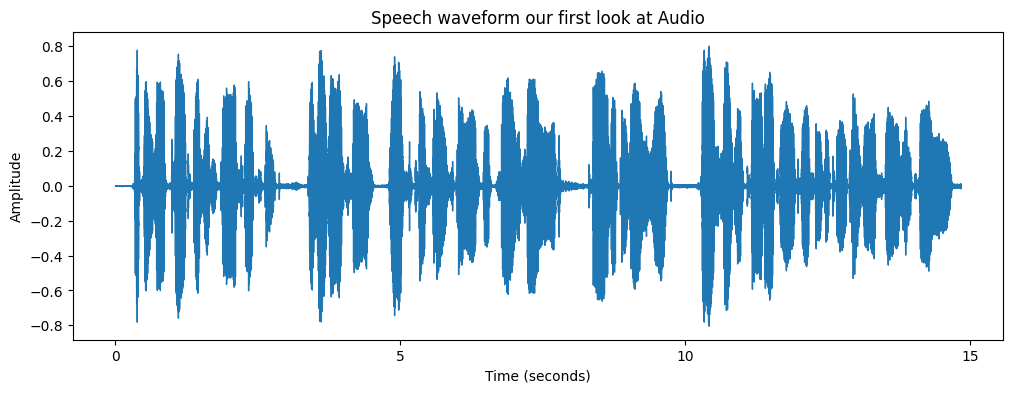

In [4]:
# Step 1: Install Required Libraries
print("🔧 Installing NLP libraries...")

!pip install -q nltk spacy
!python -q -m spacy download en_core_web_sm

print("✅ Installation complete!")





###############
!pip install -q librosa
!pip install -q matplotlib 

import librosa 
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
# Get the path to the example audio file

example_audio_path = librosa.example('libri1')  # formerly 'librosa.util.example_audio_file()'

# Load the audio file
y, Sr = librosa.load(example_audio_path, sr=16000)
# y, Sr = librosa.load('speech.wav', sr=16000)



plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=Sr)
plt.title('Speech waveform our first look at Audio')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.show()

### 🤔 Conceptual Question 2
**Why do you think we need to install a separate language model (en_core_web_sm) for spaCy? What components might this model contain that help with text processing? Think about what information a computer needs to understand English text.**

*Double-click this cell to write your answer:*

We need to install a separate language model like en_core_web_sm in spaCy because it contains the pre-trained data and rules that help the computer understand and process English text. This model includes components such as:    
	•	Vocabulary (words and their meanings)    
	•	Part-of-speech tags (e.g., noun, verb)    
	•	Syntax rules (for sentence structure)    
	•	Named entity recognition (e.g., identifying names, dates, places)    
	•	Word vectors or embeddings (for understanding word similarity)    

These components give the computer the linguistic knowledge it needs to analyze and interpret human language.    

---

In [5]:
# Step 2: Import Libraries and Download NLTK Data
import nltk
import spacy
import string
import re
from collections import Counter

# Download essential NLTK data
print("📦 Downloading NLTK data packages...")
nltk.download('punkt')      # For tokenization
nltk.download('stopwords')  # For stop word removal
nltk.download('wordnet')    # For lemmatization
nltk.download('averaged_perceptron_tagger')  # For POS tagging

print("\n✅ All imports and downloads completed!")

📦 Downloading NLTK data packages...

✅ All imports and downloads completed!


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/tobifasiku/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tobifasiku/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/tobifasiku/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/tobifasiku/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


## 📂 Part 2: Sample Text Data

We'll work with different types of text to understand how preprocessing affects various text styles:
- Simple text
- Academic text (with citations, URLs)
- Social media text (with emojis, hashtags)
- News text (formal writing)
- Product reviews (informal, ratings)

In [6]:
# Step 3: Load Sample Texts
simple_text = "Natural Language Processing is a fascinating field of AI. It's amazing!"

academic_text = """
Dr. Smith's research on machine-learning algorithms is groundbreaking!
She published 3 papers in 2023, focusing on deep neural networks (DNNs).
The results were amazing - accuracy improved by 15.7%!
"This is revolutionary," said Prof. Johnson.
Visit https://example.com for more info. #NLP #AI @university
"""

social_text = "OMG! Just tried the new coffee shop ☕️ SO GOOD!!! Highly recommend 👍 #coffee #yum 😍"

news_text = """
The stock market experienced significant volatility today, with tech stocks leading the decline.
Apple Inc. (AAPL) dropped 3.2%, while Microsoft Corp. fell 2.8%.
"We're seeing a rotation out of growth stocks," said analyst Jane Doe from XYZ Capital.
"""

review_text = """
This laptop is absolutely fantastic! I've been using it for 6 months and it's still super fast.
The battery life is incredible - lasts 8-10 hours easily.
Only complaint: the keyboard could be better. Overall rating: 4.5/5 stars.
"""

# Store all texts
sample_texts = {
    "Simple": simple_text,
    "Academic": academic_text.strip(),
    "Social Media": social_text,
    "News": news_text.strip(),
    "Product Review": review_text.strip()
}

print("📄 Sample texts loaded successfully!")
for name, text in sample_texts.items():
    preview = text[:80] + "..." if len(text) > 80 else text
    print(f"\n🏷️ {name}: {preview}")

📄 Sample texts loaded successfully!

🏷️ Simple: Natural Language Processing is a fascinating field of AI. It's amazing!

🏷️ Academic: Dr. Smith's research on machine-learning algorithms is groundbreaking!
She publi...

🏷️ Social Media: OMG! Just tried the new coffee shop ☕️ SO GOOD!!! Highly recommend 👍 #coffee #yu...

🏷️ News: The stock market experienced significant volatility today, with tech stocks lead...

🏷️ Product Review: This laptop is absolutely fantastic! I've been using it for 6 months and it's st...


### 🤔 Conceptual Question 3
**Looking at the different text types we've loaded, what preprocessing challenges do you anticipate for each type? For each text type below, identify at least 2 specific preprocessing challenges and explain why they might be problematic for NLP analysis.**

*Double-click this cell to write your answer:*

**Simple text challenges:**
1. Lack of complexity – May not provide enough linguistic variety for training models.    
2. Ambiguity – Words like “amazing” are subjective and lack context.    

**Academic text challenges:**
1. Technical jargon and abbreviations – Terms like “DNNs” may need domain-specific handling.    
2. Structured citations and quotes – Punctuation and special formatting can confuse tokenization.    

**Social media text challenges:**
1. Informal language and slang – “OMG”, emojis, and abbreviations are hard to standardize.    
2. Special symbols – Hashtags, mentions, and emojis require custom tokenization or filtering.    

**News text challenges:**
1. Named entities – Company names, stock tickers, and people need accurate recognition.    
2. Quote attribution – Handling nested quotes and identifying speakers can be complex.    

**Product review challenges:**
1. Subjectivity – Opinions and ratings are highly emotional and context-dependent.    
2. Mixed sentiment – A review might have both positive and negative phrases, complicating analysis.    

---

## 🔤 Part 3: Tokenization

### What is Tokenization?
Tokenization is the process of breaking down text into smaller, meaningful units called **tokens**. These tokens are typically words, but can also be sentences, characters, or subwords.

### Why is it Important?
- Most NLP algorithms work with individual tokens, not entire texts
- It's the foundation for all subsequent preprocessing steps
- Different tokenization strategies can significantly impact results

### Common Challenges:
- **Contractions:** "don't" → "do" + "n't" or "don't"?
- **Punctuation:** Keep with words or separate?
- **Special characters:** How to handle @, #, URLs?

In [7]:
# Step 4: Tokenization with NLTK
from nltk.tokenize import word_tokenize, sent_tokenize

# Test on simple text
print("🔍 NLTK Tokenization Results")
print("=" * 40)
print(f"Original: {simple_text}")

# Word tokenization
nltk_tokens = word_tokenize(simple_text)
print(f"\nWord tokens: {nltk_tokens}")
print(f"Number of tokens: {len(nltk_tokens)}")

# Sentence tokenization
sentences = sent_tokenize(simple_text)
print(f"\nSentences: {sentences}")
print(f"Number of sentences: {len(sentences)}")

🔍 NLTK Tokenization Results
Original: Natural Language Processing is a fascinating field of AI. It's amazing!

Word tokens: ['Natural', 'Language', 'Processing', 'is', 'a', 'fascinating', 'field', 'of', 'AI', '.', 'It', "'s", 'amazing', '!']
Number of tokens: 14

Sentences: ['Natural Language Processing is a fascinating field of AI.', "It's amazing!"]
Number of sentences: 2


### 🤔 Conceptual Question 4
**Examine the NLTK tokenization results above. How did NLTK handle the contraction "It's"? What happened to the punctuation marks? Do you think this approach is appropriate for all NLP tasks? Explain your reasoning.**

*Double-click this cell to write your answer:*

**How "It's" was handled:**
NLTK’s standard tokenizer splits “It’s” into two tokens: “It” and “’s”.    

**Punctuation treatment:**
The apostrophe stays attached to the “s” as a separate token part (”’s”), and other punctuation (e.g., “!” or “.”) is split off into its own token.    

**Appropriateness for different tasks:**    
•Pros: Breaking contractions like “It’s” into “It” and “’s” helps the computer understand grammar more clearly by separating the main word from helping words, which makes it easier to identify parts of speech and analyze sentence structure.       

•Cons: For tasks like finding emotions or meanings in text, keeping “it’s” as one word can help keep the full meaning. In the same way, models that look at character, or parts of words or letters might need a different way to handle it.    

•My conclusion: This method works well when we need to understand grammar in detail, but it’s not always the best choice. The right way to handle text depends on what kind of NLP task you’re doing and what the model needs. Sometimes, breaking words like “It’s” into “It” and “’s” helps the computer understand grammar better—like who is doing what in a sentence. But for other tasks, like figuring out a person’s opinion or emotion, keeping the words together might work better. So, there’s no one “best” way, it depends on the goal of the task.     

---

In [8]:
# Step 5: Tokenization with spaCy
nlp = spacy.load('en_core_web_sm')

print("🔍 spaCy Tokenization Results")
print("=" * 40)
print(f"Original: {simple_text}")

# Process with spaCy
doc = nlp(simple_text)

# Extract tokens
spacy_tokens = [token.text for token in doc]
print(f"\nWord tokens: {spacy_tokens}")
print(f"Number of tokens: {len(spacy_tokens)}")

# Show detailed token information
print(f"\n🔬 Detailed Token Analysis:")
print(f"{'Token':<12} {'POS':<8} {'Lemma':<12} {'Is Alpha':<8} {'Is Stop':<8}")
print("-" * 50)
for token in doc:
    print(f"{token.text:<12} {token.pos_:<8} {token.lemma_:<12} {token.is_alpha:<8} {token.is_stop:<8}")

🔍 spaCy Tokenization Results
Original: Natural Language Processing is a fascinating field of AI. It's amazing!

Word tokens: ['Natural', 'Language', 'Processing', 'is', 'a', 'fascinating', 'field', 'of', 'AI', '.', 'It', "'s", 'amazing', '!']
Number of tokens: 14

🔬 Detailed Token Analysis:
Token        POS      Lemma        Is Alpha Is Stop 
--------------------------------------------------
Natural      PROPN    Natural      1        0       
Language     PROPN    Language     1        0       
Processing   PROPN    Processing   1        0       
is           AUX      be           1        1       
a            DET      a            1        1       
fascinating  ADJ      fascinating  1        0       
field        NOUN     field        1        0       
of           ADP      of           1        1       
AI           PROPN    AI           1        0       
.            PUNCT    .            0        0       
It           PRON     it           1        1       
's           AUX     

### 🤔 Conceptual Question 5
**Compare the NLTK and spaCy tokenization results. What differences do you notice? Which approach do you think would be better for different NLP tasks? Consider specific examples like sentiment analysis vs. information extraction.**

*Double-click this cell to write your answer:*

**Key differences observed:**

**Better for sentiment analysis:**

**Better for information extraction:**

**Overall assessment:**

---

In [9]:
# Step 6: Test Tokenization on Complex Text
print("🧪 Testing on Social Media Text")
print("=" * 40)
print(f"Original: {social_text}")

# NLTK approach
social_nltk_tokens = word_tokenize(social_text)
print(f"\nNLTK tokens: {social_nltk_tokens}")

# spaCy approach
social_doc = nlp(social_text)
social_spacy_tokens = [token.text for token in social_doc]
print(f"spaCy tokens: {social_spacy_tokens}")

print(f"\n📊 Comparison:")
print(f"NLTK token count: {len(social_nltk_tokens)}")
print(f"spaCy token count: {len(social_spacy_tokens)}")

🧪 Testing on Social Media Text
Original: OMG! Just tried the new coffee shop ☕️ SO GOOD!!! Highly recommend 👍 #coffee #yum 😍

NLTK tokens: ['OMG', '!', 'Just', 'tried', 'the', 'new', 'coffee', 'shop', '☕️', 'SO', 'GOOD', '!', '!', '!', 'Highly', 'recommend', '👍', '#', 'coffee', '#', 'yum', '😍']
spaCy tokens: ['OMG', '!', 'Just', 'tried', 'the', 'new', 'coffee', 'shop', '☕', '️', 'SO', 'GOOD', '!', '!', '!', 'Highly', 'recommend', '👍', '#', 'coffee', '#', 'yum', '😍']

📊 Comparison:
NLTK token count: 22
spaCy token count: 23


### 🤔 Conceptual Question 6
**Looking at how the libraries handled social media text (emojis, hashtags), which library seems more robust for handling "messy" real-world text? What specific advantages do you notice? How might this impact a real-world application like social media sentiment analysis?**

*Double-click this cell to write your answer:*

**More robust library:**

**Specific advantages:**

**Impact on sentiment analysis:**

---

## 🛑 Part 4: Stop Words Removal

### What are Stop Words?
Stop words are common words that appear frequently in a language but typically don't carry much meaningful information about the content. Examples include "the", "is", "at", "which", "on", etc.

### Why Remove Stop Words?
1. **Reduce noise** in the data
2. **Improve efficiency** by reducing vocabulary size
3. **Focus on content words** that carry semantic meaning

### When NOT to Remove Stop Words?
- **Sentiment analysis:** "not good" vs "good" - the "not" is crucial!
- **Question answering:** "What is the capital?" - "what" and "is" provide context

In [10]:
# Step 7: Explore Stop Words Lists
from nltk.corpus import stopwords

# Get NLTK English stop words
nltk_stopwords = set(stopwords.words('english'))
print(f"📊 NLTK has {len(nltk_stopwords)} English stop words")
print(f"First 20: {sorted(list(nltk_stopwords))[:20]}")

# Get spaCy stop words
spacy_stopwords = nlp.Defaults.stop_words
print(f"\n📊 spaCy has {len(spacy_stopwords)} English stop words")
print(f"First 20: {sorted(list(spacy_stopwords))[:20]}")

# Compare the lists
common_stopwords = nltk_stopwords.intersection(spacy_stopwords)
nltk_only = nltk_stopwords - spacy_stopwords
spacy_only = spacy_stopwords - nltk_stopwords

print(f"\n🔍 Comparison:")
print(f"Common stop words: {len(common_stopwords)}")
print(f"Only in NLTK: {len(nltk_only)} - Examples: {sorted(list(nltk_only))[:5]}")
print(f"Only in spaCy: {len(spacy_only)} - Examples: {sorted(list(spacy_only))[:5]}")

📊 NLTK has 198 English stop words
First 20: ['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been']

📊 spaCy has 326 English stop words
First 20: ["'d", "'ll", "'m", "'re", "'s", "'ve", 'a', 'about', 'above', 'across', 'after', 'afterwards', 'again', 'against', 'all', 'almost', 'alone', 'along', 'already', 'also']

🔍 Comparison:
Common stop words: 123
Only in NLTK: 75 - Examples: ['ain', 'aren', "aren't", 'couldn', "couldn't"]
Only in spaCy: 203 - Examples: ["'d", "'ll", "'m", "'re", "'s"]


### 🤔 Conceptual Question 7
**Why do you think NLTK and spaCy have different stop word lists? Look at the examples of words that are only in one list - do you agree with these choices? Can you think of scenarios where these differences might significantly impact your NLP results?**

*Double-click this cell to write your answer:*

**Reasons for differences:**

**Agreement with choices:**

**Scenarios where differences matter:**

---

In [11]:
# Step 8: Remove Stop Words with NLTK
# Test on simple text
original_tokens = nltk_tokens  # From earlier tokenization
filtered_tokens = [word for word in original_tokens if word.lower() not in nltk_stopwords]

print("🧪 NLTK Stop Word Removal")
print("=" * 40)
print(f"Original: {simple_text}")
print(f"\nOriginal tokens ({len(original_tokens)}): {original_tokens}")
print(f"After removing stop words ({len(filtered_tokens)}): {filtered_tokens}")

# Show which words were removed
removed_words = [word for word in original_tokens if word.lower() in nltk_stopwords]
print(f"\nRemoved words: {removed_words}")

# Calculate reduction percentage
reduction = (len(original_tokens) - len(filtered_tokens)) / len(original_tokens) * 100
print(f"Vocabulary reduction: {reduction:.1f}%")

🧪 NLTK Stop Word Removal
Original: Natural Language Processing is a fascinating field of AI. It's amazing!

Original tokens (14): ['Natural', 'Language', 'Processing', 'is', 'a', 'fascinating', 'field', 'of', 'AI', '.', 'It', "'s", 'amazing', '!']
After removing stop words (10): ['Natural', 'Language', 'Processing', 'fascinating', 'field', 'AI', '.', "'s", 'amazing', '!']

Removed words: ['is', 'a', 'of', 'It']
Vocabulary reduction: 28.6%


In [12]:
# Step 9: Remove Stop Words with spaCy
doc = nlp(simple_text)
spacy_filtered = [token.text for token in doc if not token.is_stop and not token.is_punct]

print("🧪 spaCy Stop Word Removal")
print("=" * 40)
print(f"Original: {simple_text}")
print(f"\nOriginal tokens ({len(spacy_tokens)}): {spacy_tokens}")
print(f"After removing stop words & punctuation ({len(spacy_filtered)}): {spacy_filtered}")

# Show which words were removed
spacy_removed = [token.text for token in doc if token.is_stop or token.is_punct]
print(f"\nRemoved words: {spacy_removed}")

# Calculate reduction percentage
spacy_reduction = (len(spacy_tokens) - len(spacy_filtered)) / len(spacy_tokens) * 100
print(f"Vocabulary reduction: {spacy_reduction:.1f}%")

🧪 spaCy Stop Word Removal
Original: Natural Language Processing is a fascinating field of AI. It's amazing!

Original tokens (14): ['Natural', 'Language', 'Processing', 'is', 'a', 'fascinating', 'field', 'of', 'AI', '.', 'It', "'s", 'amazing', '!']
After removing stop words & punctuation (7): ['Natural', 'Language', 'Processing', 'fascinating', 'field', 'AI', 'amazing']

Removed words: ['is', 'a', 'of', '.', 'It', "'s", '!']
Vocabulary reduction: 50.0%


### 🤔 Conceptual Question 8
**Compare the NLTK and spaCy stop word removal results. Which approach removed more words? Do you think removing punctuation (as spaCy did) is always a good idea? Give a specific example where keeping punctuation might be important for NLP analysis.**

*Double-click this cell to write your answer:*

**Which removed more:**

**Punctuation removal assessment:**

**Example where punctuation matters:**

---

## 🌱 Part 5: Lemmatization and Stemming

### What is Lemmatization?
Lemmatization reduces words to their base or dictionary form (called a **lemma**). It considers context and part of speech to ensure the result is a valid word.

### What is Stemming?
Stemming reduces words to their root form by removing suffixes. It's faster but less accurate than lemmatization.

### Key Differences:
| Aspect | Stemming | Lemmatization |
|--------|----------|---------------|
| Speed | Fast | Slower |
| Accuracy | Lower | Higher |
| Output | May be non-words | Always valid words |
| Context | Ignores context | Considers context |

### Examples:
- **"running"** → Stem: "run", Lemma: "run"
- **"better"** → Stem: "better", Lemma: "good"
- **"was"** → Stem: "wa", Lemma: "be"

In [13]:
# Step 10: Stemming with NLTK
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

# Test words that demonstrate stemming challenges
test_words = ['running', 'runs', 'ran', 'better', 'good', 'best', 'flying', 'flies', 'was', 'were', 'cats', 'dogs']

print("🌿 Stemming Demonstration")
print("=" * 30)
print(f"{'Original':<12} {'Stemmed':<12}")
print("-" * 25)

for word in test_words:
    stemmed = stemmer.stem(word)
    print(f"{word:<12} {stemmed:<12}")

# Apply to our sample text
sample_tokens = [token for token in nltk_tokens if token.isalpha()]
stemmed_tokens = [stemmer.stem(token.lower()) for token in sample_tokens]

print(f"\n🧪 Applied to sample text:")
print(f"Original: {sample_tokens}")
print(f"Stemmed: {stemmed_tokens}")

🌿 Stemming Demonstration
Original     Stemmed     
-------------------------
running      run         
runs         run         
ran          ran         
better       better      
good         good        
best         best        
flying       fli         
flies        fli         
was          wa          
were         were        
cats         cat         
dogs         dog         

🧪 Applied to sample text:
Original: ['Natural', 'Language', 'Processing', 'is', 'a', 'fascinating', 'field', 'of', 'AI', 'It', 'amazing']
Stemmed: ['natur', 'languag', 'process', 'is', 'a', 'fascin', 'field', 'of', 'ai', 'it', 'amaz']


### 🤔 Conceptual Question 9
**Look at the stemming results above. Can you identify any cases where stemming produced questionable results? For example, how were "better" and "good" handled? Do you think this is problematic for NLP applications? Explain your reasoning.**

*Double-click this cell to write your answer:*

**Questionable results identified:**

**Assessment of "better" and "good":**

**Impact on NLP applications:**

---

In [14]:
# Step 11: Lemmatization with spaCy
print("🌱 spaCy Lemmatization Demonstration")
print("=" * 40)

# Test on a complex sentence
complex_sentence = "The researchers were studying the effects of running and swimming on better performance."
doc = nlp(complex_sentence)

print(f"Original: {complex_sentence}")
print(f"\n{'Token':<15} {'Lemma':<15} {'POS':<10} {'Explanation':<20}")
print("-" * 65)

for token in doc:
    if token.is_alpha:
        explanation = "No change" if token.text.lower() == token.lemma_ else "Lemmatized"
        print(f"{token.text:<15} {token.lemma_:<15} {token.pos_:<10} {explanation:<20}")

# Extract lemmas
lemmas = [token.lemma_.lower() for token in doc if token.is_alpha and not token.is_stop]
print(f"\n🔤 Lemmatized tokens (no stop words): {lemmas}")

🌱 spaCy Lemmatization Demonstration
Original: The researchers were studying the effects of running and swimming on better performance.

Token           Lemma           POS        Explanation         
-----------------------------------------------------------------
The             the             DET        No change           
researchers     researcher      NOUN       Lemmatized          
were            be              AUX        Lemmatized          
studying        study           VERB       Lemmatized          
the             the             DET        No change           
effects         effect          NOUN       Lemmatized          
of              of              ADP        No change           
running         run             VERB       Lemmatized          
and             and             CCONJ      No change           
swimming        swim            VERB       Lemmatized          
on              on              ADP        No change           
better          well          

In [15]:
# Step 12: Compare Stemming vs Lemmatization
comparison_words = ['better', 'running', 'studies', 'was', 'children', 'feet']

print("⚖️ Stemming vs Lemmatization Comparison")
print("=" * 50)
print(f"{'Original':<12} {'Stemmed':<12} {'Lemmatized':<12}")
print("-" * 40)

for word in comparison_words:
    # Stemming
    stemmed = stemmer.stem(word)

    # Lemmatization with spaCy
    doc = nlp(word)
    lemmatized = doc[0].lemma_

    print(f"{word:<12} {stemmed:<12} {lemmatized:<12}")

⚖️ Stemming vs Lemmatization Comparison
Original     Stemmed      Lemmatized  
----------------------------------------
better       better       well        
running      run          run         
studies      studi        study       
was          wa           be          
children     children     child       
feet         feet         foot        


### 🤔 Conceptual Question 10
**Compare the stemming and lemmatization results. Which approach do you think is more suitable for:**
1. **A search engine** (where speed is crucial and you need to match variations of words)?
2. **A sentiment analysis system** (where accuracy and meaning preservation are important)?
3. **A real-time chatbot** (where both speed and accuracy matter)?

**Explain your reasoning for each choice.**

*Double-click this cell to write your answer:*

**1. Search engine:**

**2. Sentiment analysis:**

**3. Real-time chatbot:**

---

## 🧹 Part 6: Text Cleaning and Normalization

### What is Text Cleaning?
Text cleaning involves removing or standardizing elements that might interfere with analysis:
- **Case normalization** (converting to lowercase)
- **Punctuation removal**
- **Number handling** (remove, replace, or normalize)
- **Special character handling** (URLs, emails, mentions)
- **Whitespace normalization**

### Why is it Important?
- Ensures consistency across your dataset
- Reduces vocabulary size
- Improves model performance
- Handles edge cases in real-world data

In [16]:
# Step 13: Basic Text Cleaning
def basic_clean_text(text):
    """Apply basic text cleaning operations"""
    # Convert to lowercase
    text = text.lower()

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove extra spaces again
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# Test basic cleaning
test_text = "   Hello WORLD!!! This has 123 numbers and   extra spaces.   "
cleaned = basic_clean_text(test_text)

print("🧹 Basic Text Cleaning")
print("=" * 30)
print(f"Original: '{test_text}'")
print(f"Cleaned: '{cleaned}'")
print(f"Length reduction: {(len(test_text) - len(cleaned))/len(test_text)*100:.1f}%")

🧹 Basic Text Cleaning
Original: '   Hello WORLD!!! This has 123 numbers and   extra spaces.   '
Cleaned: 'hello world this has numbers and extra spaces'
Length reduction: 26.2%


In [17]:
# Step 14: Advanced Cleaning for Social Media
def advanced_clean_text(text):
    """Apply advanced cleaning for social media and web text"""
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove email addresses
    text = re.sub(r'\S+@\S+', '', text)

    # Remove mentions (@username)
    text = re.sub(r'@\w+', '', text)

    # Convert hashtags (keep the word, remove #)
    text = re.sub(r'#(\w+)', r'\1', text)

    # Remove emojis (basic approach)
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags
                               "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)

    # Convert to lowercase and normalize whitespace
    text = text.lower()
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# Test on social media text
print("🚀 Advanced Cleaning on Social Media Text")
print("=" * 45)
print(f"Original: {social_text}")

cleaned_social = advanced_clean_text(social_text)
print(f"Cleaned: {cleaned_social}")
print(f"Length reduction: {(len(social_text) - len(cleaned_social))/len(social_text)*100:.1f}%")

🚀 Advanced Cleaning on Social Media Text
Original: OMG! Just tried the new coffee shop ☕️ SO GOOD!!! Highly recommend 👍 #coffee #yum 😍
Cleaned: omg! just tried the new coffee shop ☕️ so good!!! highly recommend coffee yum
Length reduction: 7.2%


### 🤔 Conceptual Question 11
**Look at the advanced cleaning results for the social media text. What information was lost during cleaning? Can you think of scenarios where removing emojis and hashtags might actually hurt your NLP application? What about scenarios where keeping them would be beneficial?**

*Double-click this cell to write your answer:*

**Information lost:**

**Scenarios where removal hurts:**

**Scenarios where keeping helps:**

---

## 🔧 Part 7: Building a Complete Preprocessing Pipeline

Now let's combine everything into a comprehensive preprocessing pipeline that you can customize based on your needs.

### Pipeline Components:
1. **Text cleaning** (basic or advanced)
2. **Tokenization** (NLTK or spaCy)
3. **Stop word removal** (optional)
4. **Lemmatization/Stemming** (optional)
5. **Additional filtering** (length, etc.)

In [18]:
# Step 15: Complete Preprocessing Pipeline
def preprocess_text(text,
                   clean_level='basic',     # 'basic' or 'advanced'
                   remove_stopwords=True,
                   use_lemmatization=True,
                   use_stemming=False,
                   min_length=2):
    """
    Complete text preprocessing pipeline
    """
    # Step 1: Clean text
    if clean_level == 'basic':
        cleaned_text = basic_clean_text(text)
    else:
        cleaned_text = advanced_clean_text(text)

    # Step 2: Tokenize
    if use_lemmatization:
        # Use spaCy for lemmatization
        doc = nlp(cleaned_text)
        tokens = [token.lemma_.lower() for token in doc if token.is_alpha]
    else:
        # Use NLTK for basic tokenization
        tokens = word_tokenize(cleaned_text)
        tokens = [token for token in tokens if token.isalpha()]

    # Step 3: Remove stop words
    if remove_stopwords:
        if use_lemmatization:
            tokens = [token for token in tokens if token not in spacy_stopwords]
        else:
            tokens = [token.lower() for token in tokens if token.lower() not in nltk_stopwords]

    # Step 4: Apply stemming if requested
    if use_stemming and not use_lemmatization:
        tokens = [stemmer.stem(token.lower()) for token in tokens]

    # Step 5: Filter by length
    tokens = [token for token in tokens if len(token) >= min_length]

    return tokens

print("🔧 Preprocessing Pipeline Created!")
print("✅ Ready to test different configurations.")

🔧 Preprocessing Pipeline Created!
✅ Ready to test different configurations.


In [19]:
# Step 16: Test Different Pipeline Configurations
test_text = sample_texts["Product Review"]
print(f"🎯 Testing on: {test_text[:100]}...")
print("=" * 60)

# Configuration 1: Minimal processing
minimal = preprocess_text(test_text,
                         clean_level='basic',
                         remove_stopwords=False,
                         use_lemmatization=False,
                         use_stemming=False)
print(f"\n1. Minimal processing ({len(minimal)} tokens):")
print(f"   {minimal[:10]}...")

# Configuration 2: Standard processing
standard = preprocess_text(test_text,
                          clean_level='basic',
                          remove_stopwords=True,
                          use_lemmatization=True)
print(f"\n2. Standard processing ({len(standard)} tokens):")
print(f"   {standard[:10]}...")

# Configuration 3: Aggressive processing
aggressive = preprocess_text(test_text,
                            clean_level='advanced',
                            remove_stopwords=True,
                            use_lemmatization=False,
                            use_stemming=True,
                            min_length=3)
print(f"\n3. Aggressive processing ({len(aggressive)} tokens):")
print(f"   {aggressive[:10]}...")

# Show reduction percentages
original_count = len(word_tokenize(test_text))
print(f"\n📊 Token Reduction Summary:")
print(f"   Original: {original_count} tokens")
print(f"   Minimal: {len(minimal)} ({(original_count-len(minimal))/original_count*100:.1f}% reduction)")
print(f"   Standard: {len(standard)} ({(original_count-len(standard))/original_count*100:.1f}% reduction)")
print(f"   Aggressive: {len(aggressive)} ({(original_count-len(aggressive))/original_count*100:.1f}% reduction)")

🎯 Testing on: This laptop is absolutely fantastic! I've been using it for 6 months and it's still super fast.
The ...

1. Minimal processing (34 tokens):
   ['this', 'laptop', 'is', 'absolutely', 'fantastic', 'ive', 'been', 'using', 'it', 'for']...

2. Standard processing (18 tokens):
   ['laptop', 'absolutely', 'fantastic', 've', 'use', 'month', 'super', 'fast', 'battery', 'life']...

3. Aggressive processing (21 tokens):
   ['laptop', 'absolut', 'fantast', 'use', 'month', 'still', 'super', 'fast', 'batteri', 'life']...

📊 Token Reduction Summary:
   Original: 47 tokens
   Minimal: 34 (27.7% reduction)
   Standard: 18 (61.7% reduction)
   Aggressive: 21 (55.3% reduction)


### 🤔 Conceptual Question 12
**Compare the three pipeline configurations (Minimal, Standard, Aggressive). For each configuration, analyze:**
1. **What information was preserved?**
2. **What information was lost?**
3. **What type of NLP task would this configuration be best suited for?**

*Double-click this cell to write your answer:*

**Minimal Processing:**
- Preserved:
- Lost:
- Best for:

**Standard Processing:**
- Preserved:
- Lost:
- Best for:

**Aggressive Processing:**
- Preserved:
- Lost:
- Best for:

---

In [20]:
# Step 17: Comprehensive Analysis Across Text Types
print("🔬 Comprehensive Preprocessing Analysis")
print("=" * 50)

# Test standard preprocessing on all text types
results = {}
for name, text in sample_texts.items():
    original_tokens = len(word_tokenize(text))
    processed_tokens = preprocess_text(text,
                                      clean_level='basic',
                                      remove_stopwords=True,
                                      use_lemmatization=True)

    reduction = (original_tokens - len(processed_tokens)) / original_tokens * 100
    results[name] = {
        'original': original_tokens,
        'processed': len(processed_tokens),
        'reduction': reduction,
        'sample': processed_tokens[:8]
    }

    print(f"\n📄 {name}:")
    print(f"   Original: {original_tokens} tokens")
    print(f"   Processed: {len(processed_tokens)} tokens ({reduction:.1f}% reduction)")
    print(f"   Sample: {processed_tokens[:8]}")

# Summary table
print(f"\n\n📋 Summary Table")
print(f"{'Text Type':<15} {'Original':<10} {'Processed':<10} {'Reduction':<10}")
print("-" * 50)
for name, data in results.items():
    print(f"{name:<15} {data['original']:<10} {data['processed']:<10} {data['reduction']:<10.1f}%")

🔬 Comprehensive Preprocessing Analysis

📄 Simple:
   Original: 14 tokens
   Processed: 7 tokens (50.0% reduction)
   Sample: ['natural', 'language', 'processing', 'fascinating', 'field', 'ai', 'amazing']

📄 Academic:
   Original: 61 tokens
   Processed: 26 tokens (57.4% reduction)
   Sample: ['dr', 'smiths', 'research', 'machinelearning', 'algorithm', 'groundbreake', 'publish', 'paper']

📄 Social Media:
   Original: 22 tokens
   Processed: 10 tokens (54.5% reduction)
   Sample: ['omg', 'try', 'new', 'coffee', 'shop', 'good', 'highly', 'recommend']

📄 News:
   Original: 51 tokens
   Processed: 25 tokens (51.0% reduction)
   Sample: ['stock', 'market', 'experience', 'significant', 'volatility', 'today', 'tech', 'stock']

📄 Product Review:
   Original: 47 tokens
   Processed: 18 tokens (61.7% reduction)
   Sample: ['laptop', 'absolutely', 'fantastic', 've', 'use', 'month', 'super', 'fast']


📋 Summary Table
Text Type       Original   Processed  Reduction 
---------------------------------

### 🤔 Final Conceptual Question 13
**Looking at the comprehensive analysis results across all text types:**

1. **Which text type was most affected by preprocessing?** Why do you think this happened?

2. **Which text type was least affected?** What does this tell you about the nature of that text?

3. **If you were building an NLP system to analyze customer reviews for a business, which preprocessing approach would you choose and why?**

4. **What are the main trade-offs you need to consider when choosing preprocessing techniques for any NLP project?**

*Double-click this cell to write your answer:*

**1. Most affected text type:**

**2. Least affected text type:**

**3. For customer review analysis:**

**4. Main trade-offs to consider:**

---

## 🎯 Lab Summary and Reflection

Congratulations! You've completed a comprehensive exploration of NLP preprocessing techniques.

### 🔑 Key Concepts You've Mastered:

1. **Text Preprocessing Fundamentals** - Understanding why preprocessing is crucial
2. **Tokenization Techniques** - NLTK vs spaCy approaches and their trade-offs
3. **Stop Word Management** - When to remove them and when to keep them
4. **Morphological Processing** - Stemming vs lemmatization for different use cases
5. **Text Cleaning Strategies** - Basic vs advanced cleaning for different text types
6. **Pipeline Design** - Building modular, configurable preprocessing systems

### 🎓 Real-World Applications:
These techniques form the foundation for search engines, chatbots, sentiment analysis, document classification, machine translation, and information extraction systems.

### 💡 Key Insights to Remember:
- **No Universal Solution**: Different NLP tasks require different preprocessing approaches
- **Trade-offs Are Everywhere**: Balance information preservation with noise reduction
- **Context Matters**: The same technique can help or hurt depending on your use case
- **Experimentation Is Key**: Always test and measure impact on your specific task

---

**Excellent work completing Lab 02!** 🎉

For your reflection journal, focus on the insights you gained about when and why to use different techniques, the challenges you encountered, and connections you made to real-world applications.